# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


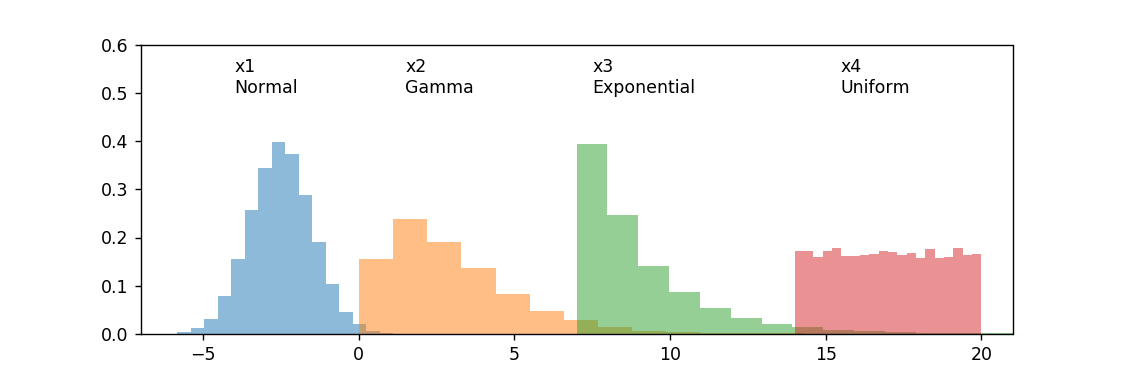

In [38]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec
from matplotlib.widgets import Slider



# Plotting the subplots for all four distributions

<IPython.core.display.Javascript object>


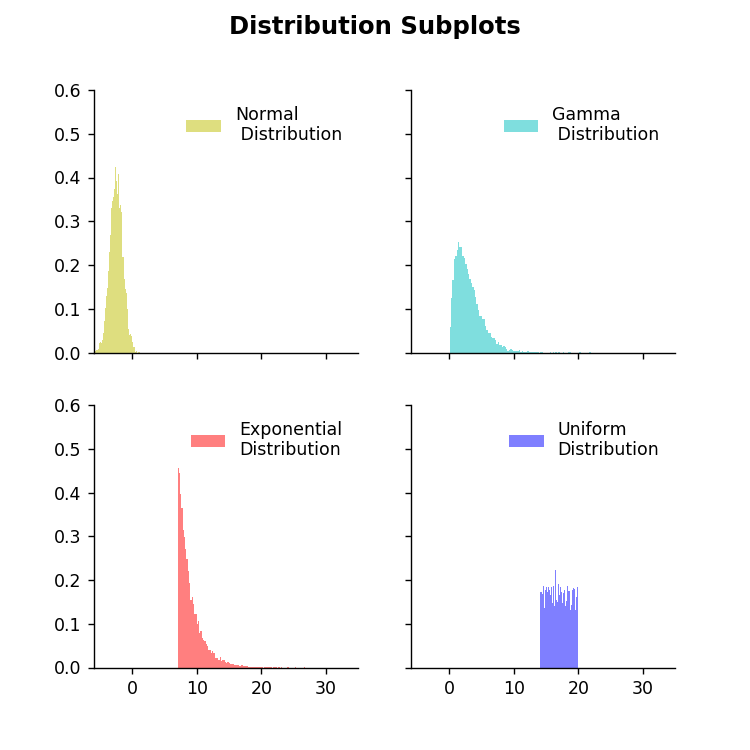

In [39]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex = True, sharey = True)

axes = [ax1,ax2,ax3,ax4]
fig.set_size_inches(6,6)
a = ax1.hist(x1,bins = 100,normed = True,color = 'y',alpha = 0.5, label = 'Normal\n Distribution')
b = ax2.hist(x2,bins = 100,normed = True,color = 'c',alpha = 0.5, label = 'Gamma\n Distribution')
c = ax3.hist(x3,bins = 100,normed = True,color = 'r',alpha = 0.5, label = 'Exponential\nDistribution')
d = ax4.hist(x4,bins = 100,normed = True,color = 'b',alpha = 0.5, label = 'Uniform\nDistribution')
plt.axis([-6,35,0,0.6])
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(loc = 0,frameon = False)
fig.suptitle('Distribution Subplots',fontsize = 14,fontweight = 'bold')


# Plotting the Animation

In [40]:
import matplotlib.animation as animation

n = 150
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a 
    if curr == n:
        a.event_source.stop()
    plt.cla()
    #bins = np.arange(-6,21,0.5)
    plt.hist(x1[:curr], bins = 20, normed = True, alpha = 0.5, label = 'Normal')
    plt.hist(x2[:curr], bins = 20, normed = True, alpha = 0.5, label = 'Gamma')
    plt.hist(x3[:curr], bins = 20, normed = True, alpha = 0.5, label = 'Exponential')
    plt.hist(x4[:curr], bins = 20, normed = True, alpha = 0.5, label = 'Uniform')
    plt.axis([-6,35,0,0.6])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().set_title('Distribution Subplots', fontweight = 'bold', fontsize = 14)
    plt.gca().set_xlabel('Values')
    plt.gca().set_ylabel('Density Frequency')
    plt.legend(loc = 0 , frameon = False)
    plt.annotate('n = {}'.format(curr),[3,27])     

<IPython.core.display.Javascript object>


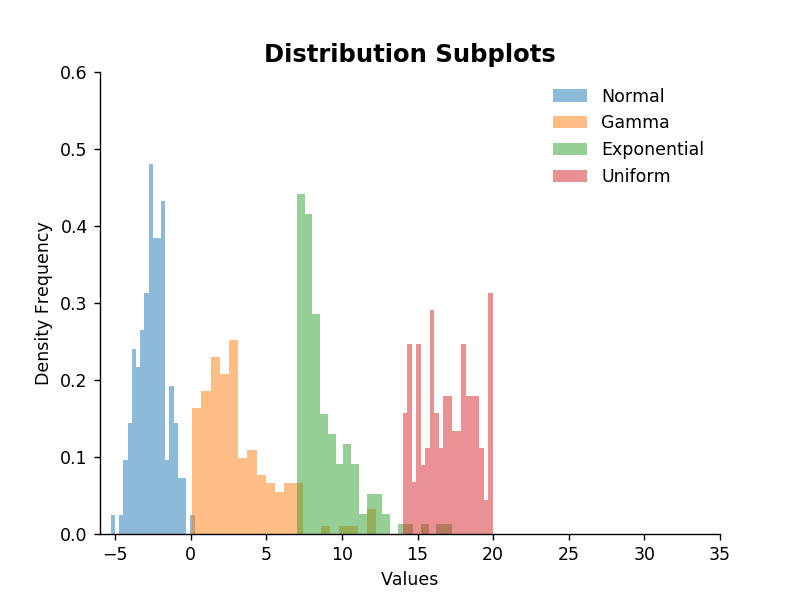

In [41]:
# fig = plt.figure()
# a = animation.FuncAnimation(fig,update,interval = 100)

fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)